In [23]:

from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '140bc7fd-4ec3-453c-9f47-df5944114b67',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

{'status': {'timestamp': '2023-08-15T19:54:05.660Z', 'error_code': 0, 'error_message': None, 'elapsed': 29, 'credit_count': 1, 'notice': None, 'total_count': 9598}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10390, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

In [24]:
type(data)

dict

In [25]:
import pandas as pd

In [26]:
df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')

C:\Users\satya\anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:2199: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(


In [27]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,...,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10390,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19458312.00000,19458312.00000,...,49.02460,612307815026.39001,None,2023-08-15T19:52:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-08-15 19:54:08.428736
1,1027,Ethereum,ETH,ethereum,7234,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120142222.58951,120142222.58951,...,18.95050,219272418992.51001,None,2023-08-15T19:52:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-08-15 19:54:08.428736
2,825,Tether USDt,USDT,tether,59455,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,83410866925.51559,86684257831.22238,...,7.20120,86594014826.70000,None,2023-08-15T19:52:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-08-15 19:54:08.428736
3,1839,BNB,BNB,bnb,1571,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,153842130.85354,153842130.85354,...,3.13900,36321064638.87000,None,2023-08-15T19:52:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-08-15 19:54:08.428736
4,52,XRP,XRP,xrp,1029,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,52787284454.00000,99988519823.00000,...,2.75380,60340105237.84000,None,2023-08-15T19:52:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-08-15 19:54:08.428736
5,3408,USD Coin,USDC,usd-coin,13602,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,25925104648.80203,25925104648.80203,...,2.24050,25924898797.71000,None,2023-08-15T19:52:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-08-15 19:54:08.428736
6,74,Dogecoin,DOGE,dogecoin,767,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,140603036383.70526,140603036383.70526,...,0.86420,9999183563.36000,None,2023-08-15T19:52:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-08-15 19:54:08.428736
7,2010,Cardano,ADA,cardano,890,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",45000000000.00000,35037799255.50100,36076551300.29000,...,0.85110,12643159446.43000,None,2023-08-15T19:52:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-08-15 19:54:08.428736
8,5426,Solana,SOL,solana,497,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,406100189.49787,554932739.65557,...,0.84340,13330089127.01000,None,2023-08-15T19:52:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-08-15 19:54:08.428736
9,1958,TRON,TRX,tron,808,2017-09-13T00:00:00.000Z,"[media, payments, tron-ecosystem, sec-security...",NaN,89463311459.22310,89463358853.63995,...,0.59010,6827721032.05000,None,2023-08-15T19:52:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-08-15 19:54:08.428736


In [28]:
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '140bc7fd-4ec3-453c-9f47-df5944114b67',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)
    
    df2 = pd.json_normalize(data['data'])
    df2['timestamp'] = pd.to_datetime('now')
    df = df.append(df2)
    
    # Putting the data into a CSV file
    
    #if not os.path.isfile(r'C:\Users\satya\OneDrive\Documents\API.csv'):
    #    df.to_csv(r'C:\Users\satya\OneDrive\Documents\API.csv', header='column_names')
    #else:
    #    df.to_csv(r'C:\Users\satya\OneDrive\Documents\API.csv', mode='a', header=False)

In [29]:
import os 
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print('API Runner completed successfully')
    sleep(60) #sleep for 1 minute
exit()

#program is stopped after 1 try for demonstration purpose

C:\Users\satya\anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:2199: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(
C:\Users\satya\AppData\Local\Temp\ipykernel_20280\87160345.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)


API Runner completed successfully


C:\Users\satya\anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:2199: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(
C:\Users\satya\AppData\Local\Temp\ipykernel_20280\87160345.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)


API Runner completed successfully


C:\Users\satya\anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:2199: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(
C:\Users\satya\AppData\Local\Temp\ipykernel_20280\87160345.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)


API Runner completed successfully


C:\Users\satya\anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:2199: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(
C:\Users\satya\AppData\Local\Temp\ipykernel_20280\87160345.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)


API Runner completed successfully


C:\Users\satya\anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:2199: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(
C:\Users\satya\AppData\Local\Temp\ipykernel_20280\87160345.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)


API Runner completed successfully


C:\Users\satya\anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:2199: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(
C:\Users\satya\AppData\Local\Temp\ipykernel_20280\87160345.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)


API Runner completed successfully


C:\Users\satya\anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:2199: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(
C:\Users\satya\AppData\Local\Temp\ipykernel_20280\87160345.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)


API Runner completed successfully


C:\Users\satya\anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:2199: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(
C:\Users\satya\AppData\Local\Temp\ipykernel_20280\87160345.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)


API Runner completed successfully


C:\Users\satya\anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:2199: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(
C:\Users\satya\AppData\Local\Temp\ipykernel_20280\87160345.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)


API Runner completed successfully


C:\Users\satya\anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:2199: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(
C:\Users\satya\AppData\Local\Temp\ipykernel_20280\87160345.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)


API Runner completed successfully


C:\Users\satya\anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:2199: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(
C:\Users\satya\AppData\Local\Temp\ipykernel_20280\87160345.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)


API Runner completed successfully


C:\Users\satya\anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:2199: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(
C:\Users\satya\AppData\Local\Temp\ipykernel_20280\87160345.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)


API Runner completed successfully


C:\Users\satya\anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:2199: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(
C:\Users\satya\AppData\Local\Temp\ipykernel_20280\87160345.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)


API Runner completed successfully


C:\Users\satya\anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:2199: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(
C:\Users\satya\AppData\Local\Temp\ipykernel_20280\87160345.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)


API Runner completed successfully


C:\Users\satya\anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:2199: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(
C:\Users\satya\AppData\Local\Temp\ipykernel_20280\87160345.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)


API Runner completed successfully


KeyboardInterrupt: 

In [30]:
# for CSV files

#df = pd.read_csv(r'C:\Users\satya\OneDrive\Documents\API.csv')

In [31]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [32]:
df.columns

Index(['id', 'name', 'symbol', 'slug', 'num_market_pairs', 'date_added',
       'tags', 'max_supply', 'circulating_supply', 'total_supply',
       'infinite_supply', 'platform', 'cmc_rank',
       'self_reported_circulating_supply', 'self_reported_market_cap',
       'tvl_ratio', 'last_updated', 'quote.USD.price', 'quote.USD.volume_24h',
       'quote.USD.volume_change_24h', 'quote.USD.percent_change_1h',
       'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d',
       'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d',
       'quote.USD.percent_change_90d', 'quote.USD.market_cap',
       'quote.USD.market_cap_dominance', 'quote.USD.fully_diluted_market_cap',
       'quote.USD.tvl', 'quote.USD.last_updated', 'platform.id',
       'platform.name', 'platform.symbol', 'platform.slug',
       'platform.token_address', 'timestamp'],
      dtype='object')

In [33]:
df3 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,-0.47022,-0.54634,-2.42211,-3.68835,10.55776,6.41032
Ethereum,-0.70153,-0.78027,-1.78320,-5.37095,6.13449,-0.20220
Tether USDt,0.01359,0.03446,-0.08331,-0.14285,-0.02712,-0.10371
BNB,-1.15791,-1.60600,-4.18019,-3.54563,-1.44423,-24.78029
XRP,-2.93568,-3.93579,-5.34119,-19.31590,27.69759,34.26477
USD Coin,0.00767,0.01511,-0.01213,0.00843,-0.01353,0.00733
Dogecoin,-2.85555,-4.05451,-4.86375,2.11360,14.29539,-5.20828
Cardano,-2.12148,-2.90032,-6.15879,-11.31050,6.66025,-25.70348
Solana,-2.39562,-3.11921,-2.13589,-12.60013,57.44818,13.92595


In [34]:
df4 = df3.stack()
df4

name                                 
Bitcoin  quote.USD.percent_change_1h    -0.47022
         quote.USD.percent_change_24h   -0.54634
         quote.USD.percent_change_7d    -2.42211
         quote.USD.percent_change_30d   -3.68835
         quote.USD.percent_change_60d   10.55776
                                          ...   
Dai      quote.USD.percent_change_24h    0.00842
         quote.USD.percent_change_7d    -0.08068
         quote.USD.percent_change_30d    0.02922
         quote.USD.percent_change_60d   -0.10570
         quote.USD.percent_change_90d   -0.08028
Length: 90, dtype: float64

In [35]:
type(df4)

pandas.core.series.Series

In [36]:
df5 = df4.to_frame(name='values')
df5

values
name                                         
Bitcoin quote.USD.percent_change_1h  -0.47022
        quote.USD.percent_change_24h -0.54634
        quote.USD.percent_change_7d  -2.42211
        quote.USD.percent_change_30d -3.68835
        quote.USD.percent_change_60d 10.55776
...                                       ...
Dai     quote.USD.percent_change_24h  0.00842
        quote.USD.percent_change_7d  -0.08068
        quote.USD.percent_change_30d  0.02922
        quote.USD.percent_change_60d -0.10570
        quote.USD.percent_change_90d -0.08028

[90 rows x 1 columns]

In [37]:
#Because of how it's structured above we need to set an index. I don't want to pass a column as an index for this dataframe
#So I'm going to create a range and pass that as the dataframe. You can make this more dynamic, but I'm just going to hard code it


index = pd.Index(range(90))

# Set the above DataFrame index object as the index
# using set_index() function
df6 = df5.reset_index()
df6

# If it only has the index and values try doing reset_index like "df5.reset_index()"

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,-0.47022
1,Bitcoin,quote.USD.percent_change_24h,-0.54634
2,Bitcoin,quote.USD.percent_change_7d,-2.42211
3,Bitcoin,quote.USD.percent_change_30d,-3.68835
4,Bitcoin,quote.USD.percent_change_60d,10.55776
...,...,...,...
85,Dai,quote.USD.percent_change_24h,0.00842
86,Dai,quote.USD.percent_change_7d,-0.08068
87,Dai,quote.USD.percent_change_30d,0.02922
88,Dai,quote.USD.percent_change_60d,-0.10570


In [38]:
# If it only has the index and values try doing reset_index like "df5.reset_index()"
# Change the column name

df7 = df6.rename(columns={'level_1': 'percent_change'})
df7


,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,-0.47022
1,Bitcoin,quote.USD.percent_change_24h,-0.54634
2,Bitcoin,quote.USD.percent_change_7d,-2.42211
3,Bitcoin,quote.USD.percent_change_30d,-3.68835
4,Bitcoin,quote.USD.percent_change_60d,10.55776
...,...,...,...
85,Dai,quote.USD.percent_change_24h,0.00842
86,Dai,quote.USD.percent_change_7d,-0.08068
87,Dai,quote.USD.percent_change_30d,0.02922
88,Dai,quote.USD.percent_change_60d,-0.10570


In [39]:
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['24h','7d','30d','60d','90d'])
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,-0.47022
1,Bitcoin,24h,-0.54634
2,Bitcoin,7d,-2.42211
3,Bitcoin,30d,-3.68835
4,Bitcoin,60d,10.55776
...,...,...,...
85,Dai,24h,0.00842
86,Dai,7d,-0.08068
87,Dai,30d,0.02922
88,Dai,60d,-0.10570


In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

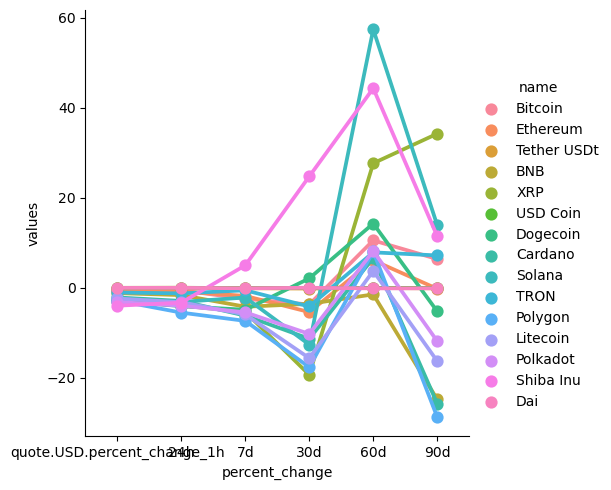

In [41]:
sns.catplot(x='percent_change', y='values', hue='name', data=df7, kind='point')


In [42]:
# Now to do something much simpler
# we are going to create a dataframe with the columns we want

df10 = df[['name','quote.USD.price','timestamp']]
df10 = df10.query("name == 'Bitcoin'")
df10

,name,quote.USD.price,timestamp
0,Bitcoin,29157.51500,2023-08-15 19:54:08.428736
0,Bitcoin,29157.51500,2023-08-15 19:54:11.811488
0,Bitcoin,29158.81041,2023-08-15 19:55:12.188814
0,Bitcoin,29174.53156,2023-08-15 19:56:12.533206
0,Bitcoin,29181.55281,2023-08-15 19:57:12.756289
0,Bitcoin,29188.24669,2023-08-15 19:58:13.117449
0,Bitcoin,29175.74262,2023-08-15 19:59:13.468777
0,Bitcoin,29164.66804,2023-08-15 20:00:13.704542
0,Bitcoin,29163.69389,2023-08-15 20:01:13.936727
0,Bitcoin,29162.58062,2023-08-15 20:02:14.309515


<Axes: xlabel='timestamp', ylabel='quote.USD.price'>

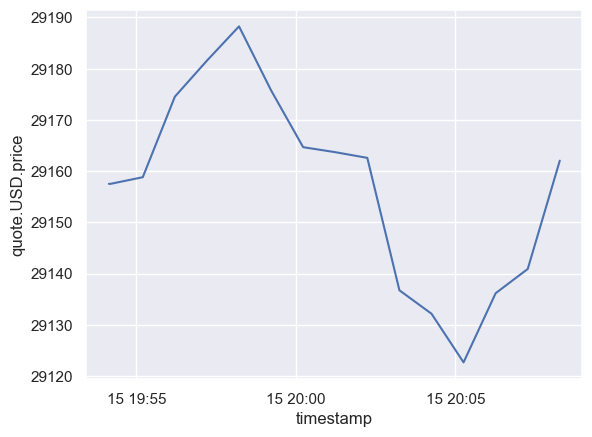

In [44]:
sns.set_theme(style='darkgrid')
sns.lineplot(x='timestamp', y='quote.USD.price', data = df10)